# Multiple Linear Regression


# Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


# Dataset Description:

The dataset consists of the following variables:

Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax: 

Price: Offer Price in EUROs


In [60]:
import pandas as pd
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Load the dataset
data = pd.read_csv('ToyotaCorolla - MLR.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [61]:
# Display the first few rows of the dataset
print(data.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


# Taskes:
# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [62]:
# Summary statistics
print(data.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

# Visualizations

# 1)Distribution of Price


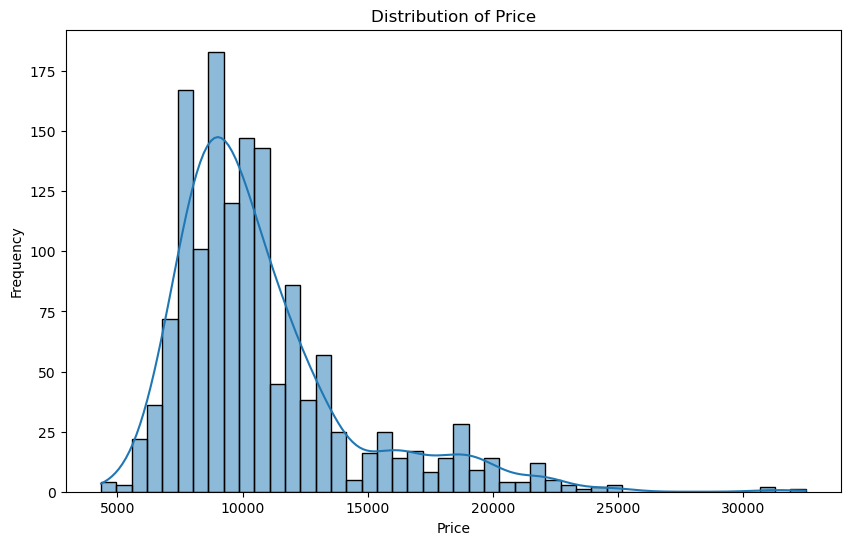

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot of Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2)Pairplot of Features

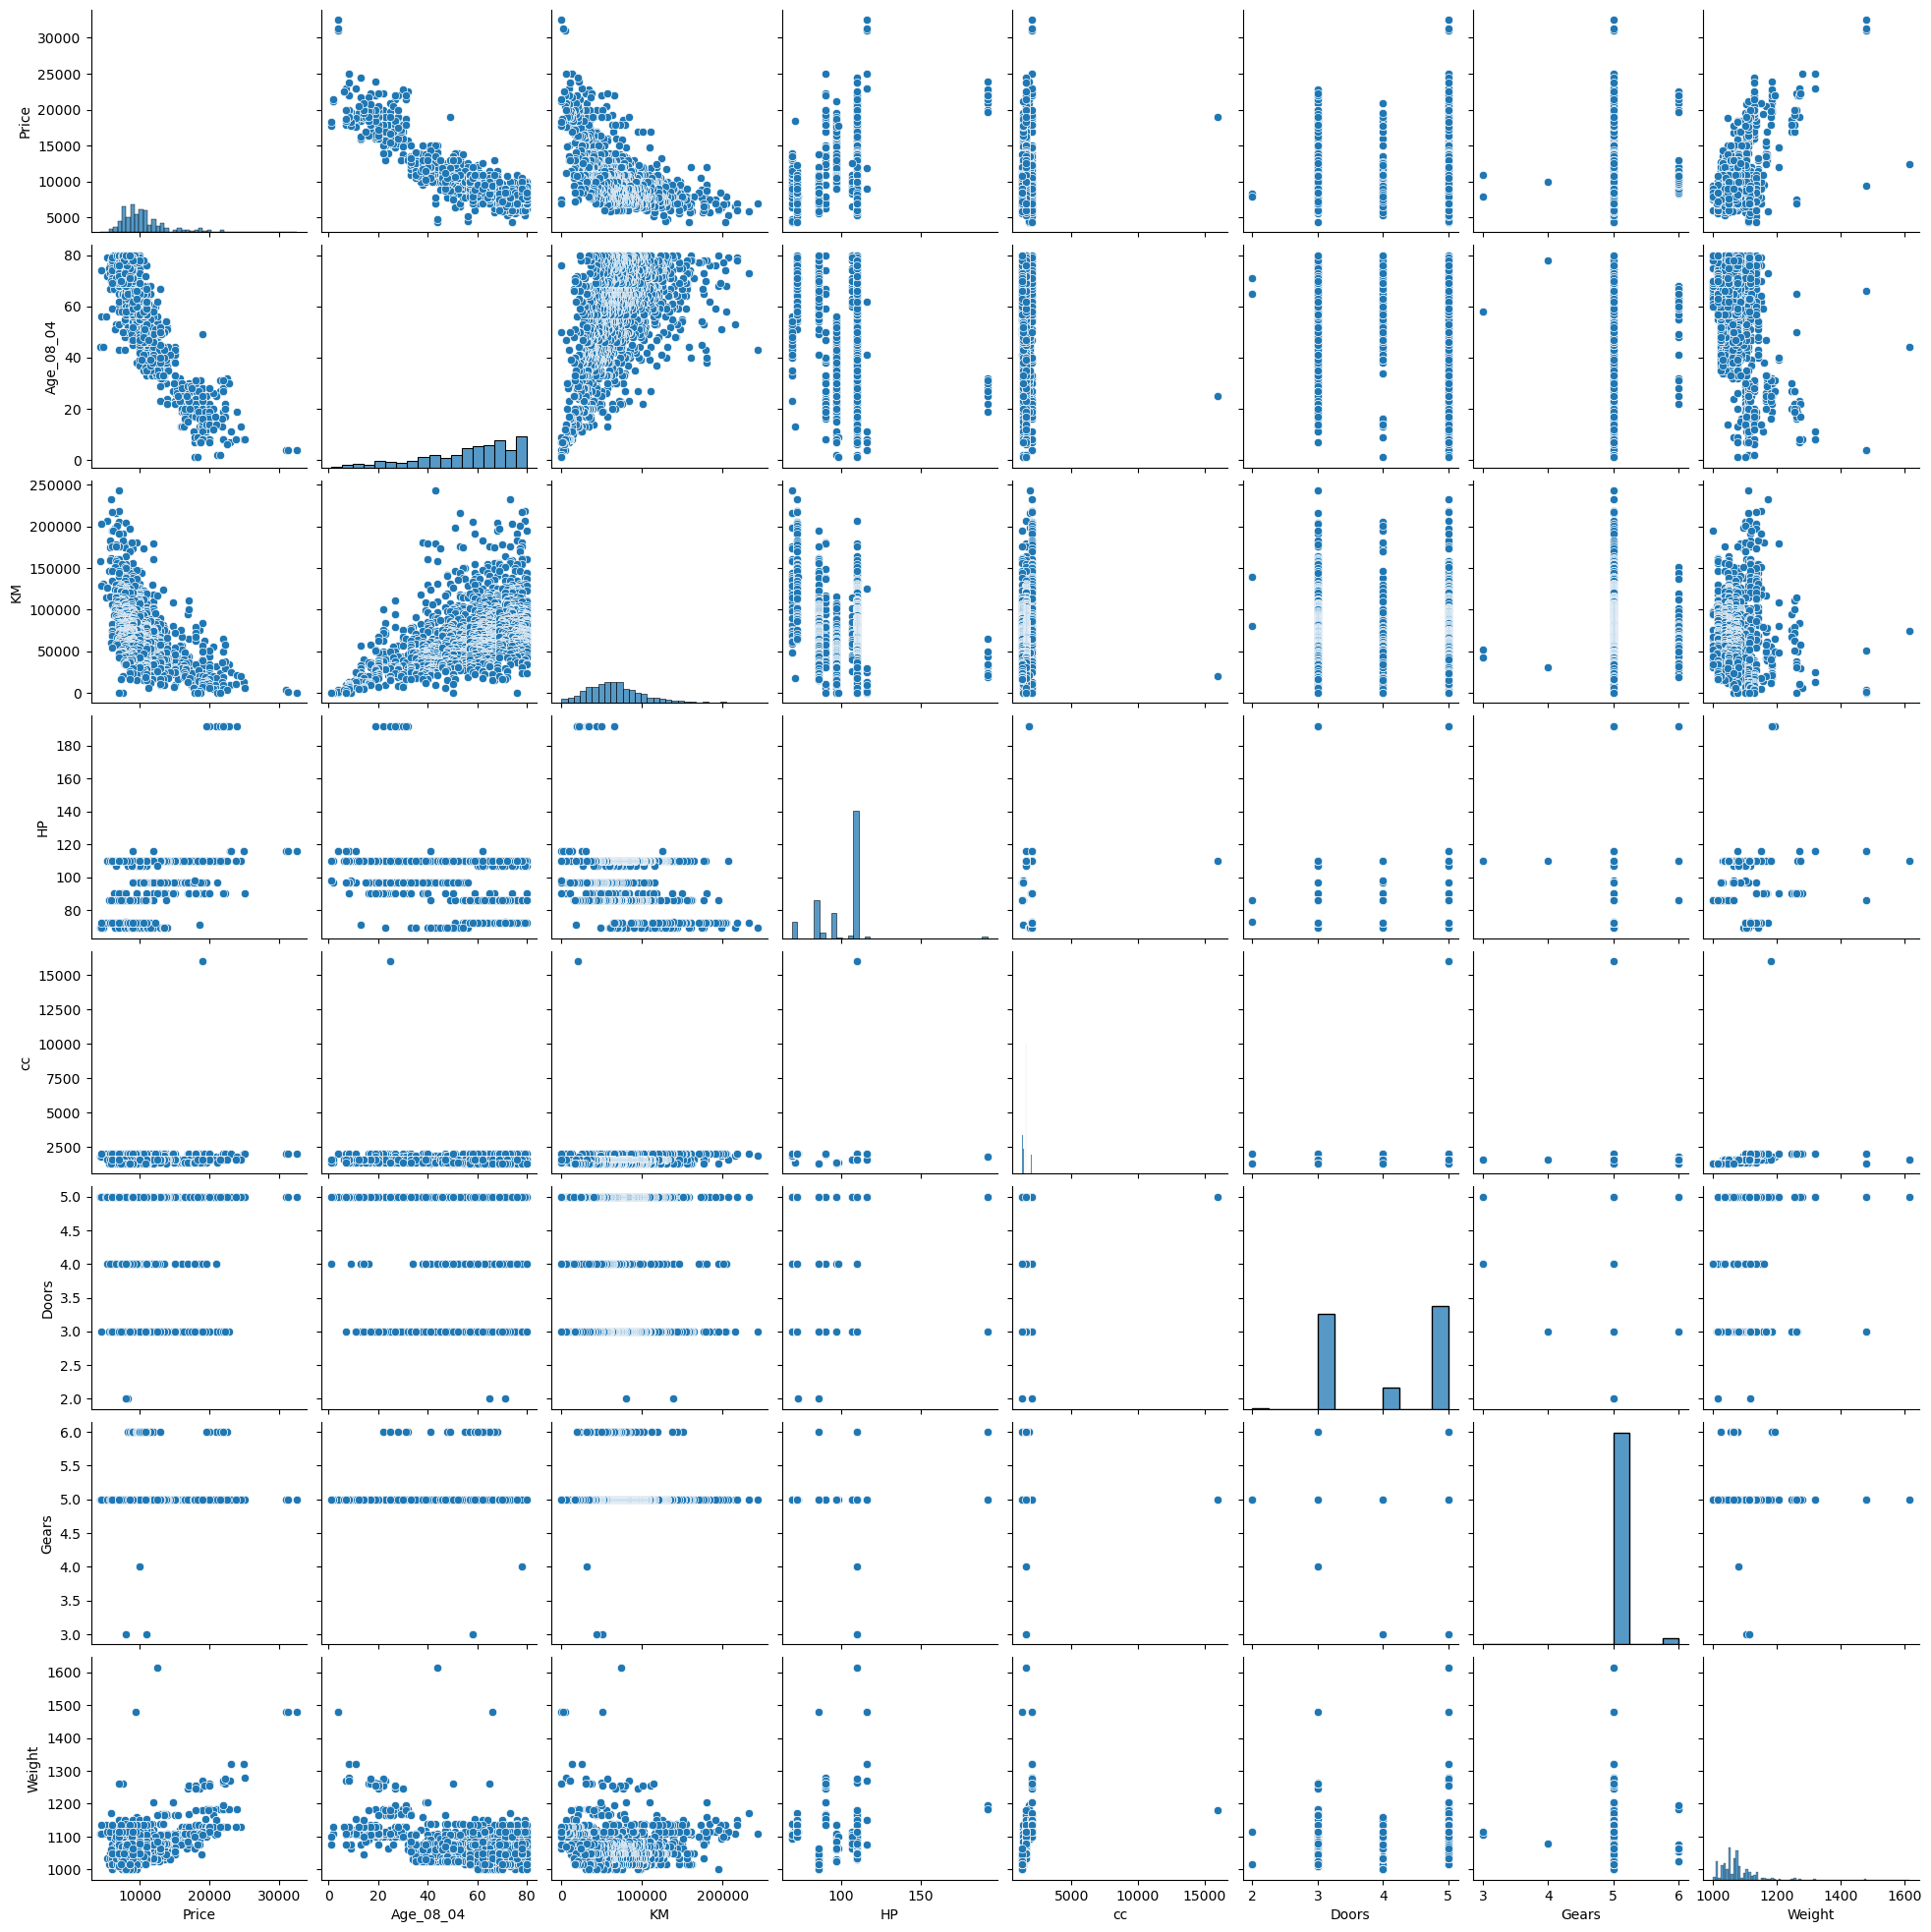

In [64]:
# Pairplot to visualize relationships
sns.pairplot(data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']])
plt.show()

# 3)Boxplot of Price by Fuel Type

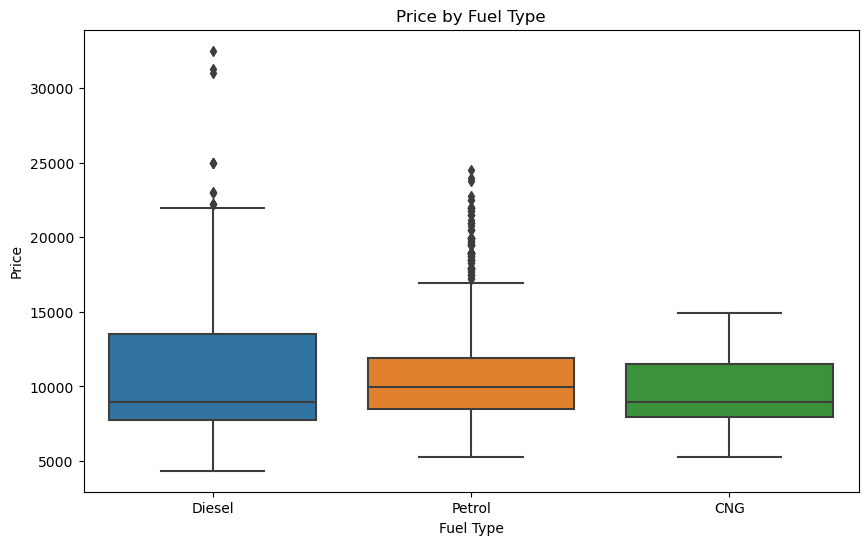

In [65]:
# Boxplot of Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=data)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Data Preprocessing

Handle Missing Values

In [66]:
# Check for missing values
print(data.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [67]:
# No missing values are indicated here, proceed with encoding and preprocessing

Encode Categorical Variables

In [89]:
# Check for non-numeric values in the target variable
import numpy as np
non_numeric_values = y_train[~y_train.apply(np.isreal)]
print("Non-numeric values in the target variable:")
print(non_numeric_values)

# Check for missing values in the target variable
missing_values = y_train.isnull().sum()
print("Missing values in the target variable:")
print(missing_values)

Non-numeric values in the target variable:
Series([], Name: Price, dtype: int64)
Missing values in the target variable:
0


In [90]:
# Check for non-numeric values in the features
non_numeric_values = X_train.select_dtypes(exclude=np.number).columns
print("Non-numeric values in the features:")
print(non_numeric_values)

# Check for missing values in the features
missing_values = X_train.isnull().sum()
print("Missing values in the features:")
print(missing_values)

Non-numeric values in the features:
Index(['Fuel_Type_Diesel', 'Fuel_Type_Petrol'], dtype='object')
Missing values in the features:
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


In [91]:
# Check unique values in Fuel_Type_Diesel and Fuel_Type_Petrol
unique_values_diesel = X_train['Fuel_Type_Diesel'].unique()
unique_values_petrol = X_train['Fuel_Type_Petrol'].unique()

print("Unique values in Fuel_Type_Diesel:", unique_values_diesel)
print("Unique values in Fuel_Type_Petrol:", unique_values_petrol)

Unique values in Fuel_Type_Diesel: [False  True]
Unique values in Fuel_Type_Petrol: [ True False]


In [92]:
# Convert all features to numeric data type
X_train = X_train.astype(float)

# Add constant to the features
X_train_const = sm.add_constant(X_train)


In [94]:
# Select features for regression
features = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']
target = 'Price'

X = data[features]
y = data[target]

# One-hot encode the 'Fuel_Type' column
X = pd.get_dummies(X, columns=['Fuel_Type'], drop_first=True)

# Ensure all data is numeric
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

# Check for any non-numeric data
print(X.dtypes)
print(y.dtypes)

Age_08_04           int64
KM                  int64
HP                  int64
Automatic           int64
cc                  int64
Doors               int64
Gears               int64
Weight              int64
Fuel_Type_Diesel     bool
Fuel_Type_Petrol     bool
dtype: object
int64


# Correlation heatmap

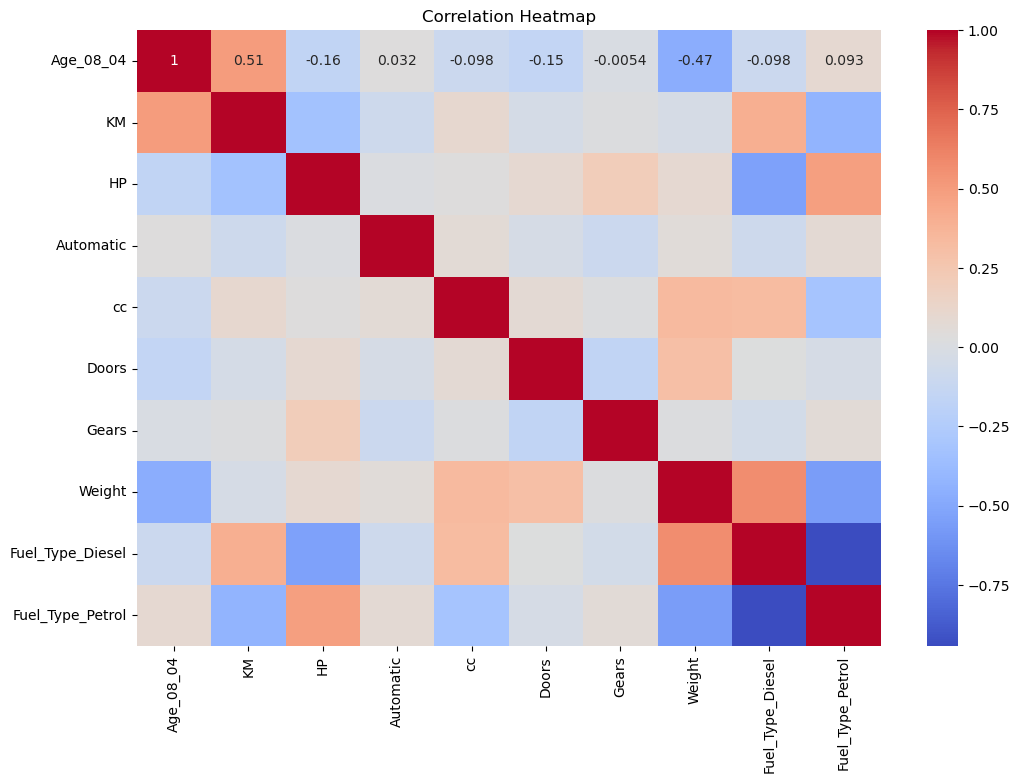

In [73]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2)Split the Data

In [74]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 1148
Testing set size: 288


# Train the Model

In [75]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

R-squared: 0.8348888040611082
RMSE: 1484.265415329652


# Make Predictions

In [77]:
# Example new data
new_data = pd.DataFrame({
    'Age_08_04': [30],
    'KM': [50000],
    'HP': [90],
    'Automatic': [0],
    'cc': [1600],
    'Doors': [5],
    'Gears': [5],
    'Weight': [1100],
    'Fuel_Type_Diesel': [1],  # Include Fuel_Type_Diesel and Fuel_Type_Petrol based on your encoding
    'Fuel_Type_Petrol': [0]
})

# Make predictions
prediction = model.predict(new_data)
print(f'Predicted Price: {prediction[0]}')

Predicted Price: 13384.441375877585


# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.


# Model 1: All Features

In [95]:
import statsmodels.api as sm

# Add constant to the model (intercept)
X_train_const = sm.add_constant(X_train)

# Build and fit the model
model1 = sm.OLS(y_train, X_train_const).fit()

# Summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        14:37:38   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.426e+04   1751.390  

# Model 2: Significant Features Only

In [79]:
# Select significant features based on p-values from model1
# Let's assume 'Age_08_04', 'KM', 'HP', and 'Weight' are significant (p < 0.05)
significant_features = ['Age_08_04', 'KM', 'HP', 'Weight']

X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

# Add constant to the model (intercept)
X_train_const_significant = sm.add_constant(X_train_significant)

# Build and fit the model
model2 = sm.OLS(y_train, X_train_const_significant).fit()

# Summary of the model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1820.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        14:31:45   Log-Likelihood:                -9889.1
No. Observations:                1148   AIC:                         1.979e+04
Df Residuals:                    1143   BIC:                         1.981e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5304.9714   1078.403     -4.919      0.0

# Model 3: Numerical Features Only

In [80]:
# Select numerical features only
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']

X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

# Add constant to the model (intercept)
X_train_const_numerical = sm.add_constant(X_train_numerical)

# Build and fit the model
model3 = sm.OLS(y_train, X_train_const_numerical).fit()

# Summary of the model
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1047.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        14:31:50   Log-Likelihood:                -9884.4
No. Observations:                1148   AIC:                         1.978e+04
Df Residuals:                    1140   BIC:                         1.983e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8223.9715   1458.590     -5.638      0.0

# Interpreting the coefficients: Model 1

Intercept (const): The expected value of Price when all predictors are zero.

Age_08_04: The expected change in Price for a one-unit increase in Age_08_04, holding all other variables constant.

KM: The expected change in Price for a one-unit increase in KM, holding all other variables constant.
HP, Automatic, cc, Doors, Gears,Weight: Similar interpretation as above.

Fuel_Type_Diesel, Fuel_Type_Petrol: The expected change in Price compared to the baseline (CNG), holding all other variables constant.

# Interpreting the coefficients: Model 2
Similar to model 1 but only includes significant predictors.

# Interpreting the coefficients: Model 3
Similar to model 1 but only includes numerical predictors.

# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.


In [81]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.8348888040611082
Mean Absolute Error: 990.8872739193923
Mean Squared Error: 2203043.823143704
Root Mean Squared Error: 1484.265415329652


# 5.Apply Lasso and Ridge methods on the model.


In [82]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the Lasso model:

In [83]:
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength with the alpha parameter
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

# Make predictions using the Lasso model:

In [84]:
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the performance of the Lasso model:

In [85]:
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)

# Repeat same  steps  for Ridge regression:

In [86]:
ridge_model = Ridge(alpha=0.1)  # Adjust the regularization strength with the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)

# Display Results

In [87]:

# Display results
print("Lasso Regression Results:")
print(f"R-squared: {lasso_r2}")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Mean Squared Error: {lasso_mse}")
print(f"Root Mean Squared Error: {lasso_rmse}")

print("\nRidge Regression Results:")
print(f"R-squared: {ridge_r2}")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Root Mean Squared Error: {ridge_rmse}")

Lasso Regression Results:
R-squared: 0.8349467801805
Mean Absolute Error: 990.8940127223728
Mean Squared Error: 2202270.2600246826
Root Mean Squared Error: 1484.0048045827489

Ridge Regression Results:
R-squared: 0.8349121559240109
Mean Absolute Error: 990.870125029498
Mean Squared Error: 2202732.244167885
Root Mean Squared Error: 1484.1604509512727
